# Introduction
This project uses the previous year's NFL event data to generate new stats. The focus or the theme of the NFL Big Data Bowl 2024 competition is in the area of 'tackle'. A 'tackle' is essentially when all the 11 defensive players try to catch and snatch the ball from the offensive ball carrier as quickly as possible. Since a 'tackle' is a defensive tactic, we try to create a strategy for defensive teams. 

# Problem Statement
The main challenge is to correctly predict the success of tackles in a game. The objective is to create a predictive model that can predict the successful tackles.  

# Prediction of tackles

In [1]:
# Install necessary libraries
!pip install seaborn
!pip install numpy 
!pip install pandas
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [43]:
#Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [84]:
# Load necessary libraries
import numpy as np # For linear algebra
import pandas as pd # To load load
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt # For Visualization
from sklearn.model_selection import train_test_split # For splitting data
from sklearn.metrics import roc_curve, auc, roc_auc_score # Model performance metrics

## Data Transformation and Cleaning 

In [3]:
# Load the datasets into pandas dataframes
games = pd.read_csv('Downloads/nfl-big-data-bowl-2024/games.csv')
players = pd.read_csv('Downloads/nfl-big-data-bowl-2024/players.csv')
plays = pd.read_csv('Downloads/nfl-big-data-bowl-2024/plays.csv')
tackles = pd.read_csv('Downloads/nfl-big-data-bowl-2024/tackles.csv') 

In [4]:
# Peak into the datasets
games.head(5)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [5]:
games.describe()

,gameId,season,week,homeFinalScore,visitorFinalScore
count,1.360000e+02,136.0,136.000000,136.000000,136.000000
mean,2.022099e+09,2022.0,4.845588,22.669118,20.948529
std,5.996614e+03,0.0,2.567254,8.659874,9.731446
min,2.022091e+09,2022.0,1.000000,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,17.000000,14.750000
50%,2.022101e+09,2022.0,5.000000,22.500000,20.000000
75%,2.022102e+09,2022.0,7.000000,27.000000,27.000000
max,2.022111e+09,2022.0,9.000000,49.000000,48.000000


### Insights from games df
It has gameId to identify each game, along with the score of home team's and visitor teams. We can if the home team won by checking if (homeFinalScore - visitorFinalScore) > 0

In [6]:
players.head(5)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [7]:
players.describe()

,nflId,weight
count,1683.000000,1683.000000
mean,48221.702317,245.724302
std,5217.040133,47.119299
min,25511.000000,153.000000
25%,44828.500000,205.000000
50%,47872.000000,236.000000
75%,53471.500000,290.000000
max,55241.000000,380.000000


In [8]:
plays.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [9]:
plays.describe()

,gameId,playId,ballCarrierId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,passLength,...,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulNFLId1,foulNFLId2
count,1.248600e+04,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,5634.000000,...,12481.000000,12149.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12485.000000,592.000000,25.00000
mean,2.022099e+09,1986.603476,48072.271664,2.550136,1.727054,8.469085,29.573122,11.170671,9.862967,5.455982,...,6.424085,0.603845,0.556236,0.443764,0.000110,-0.000110,2.258360,0.297367,47759.856419,50000.56000
std,5.953106e+03,1174.657363,4648.681597,1.136714,0.793536,3.927737,12.446971,9.442045,9.142307,8.258211,...,1.014728,0.237096,0.287751,0.287751,0.036748,0.036748,1.619769,1.194641,5010.592593,3494.05977
min,2.022091e+09,54.000000,25511.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-9.000000,...,1.000000,0.005607,0.001049,0.000825,-0.521181,-0.471527,-2.366872,-9.986150,33107.000000,43586.00000
25%,2.022093e+09,954.000000,44860.000000,2.000000,1.000000,6.000000,21.000000,3.000000,0.000000,0.000000,...,6.000000,0.447226,0.331557,0.207915,-0.011382,-0.011799,1.055965,-0.437525,43572.750000,47790.00000
50%,2.022101e+09,1990.500000,47789.000000,3.000000,2.000000,10.000000,30.000000,10.000000,7.000000,4.000000,...,6.000000,0.584451,0.585621,0.414379,0.000008,-0.000008,2.031321,0.112532,47793.500000,48089.00000
75%,2.022102e+09,2989.000000,52733.000000,4.000000,2.000000,10.000000,40.000000,17.000000,16.000000,9.000000,...,7.000000,0.792913,0.792085,0.668443,0.011799,0.011382,3.451942,0.899947,53063.000000,52553.00000
max,2.022111e+09,5096.000000,55158.000000,5.000000,4.000000,38.000000,50.000000,49.000000,48.000000,61.000000,...,11.000000,0.996206,0.999175,0.998951,0.471527,0.521181,6.558894,8.698986,55157.000000,54650.00000


### Insights from plays df
By looking at playDescription from the plays df, we can categorize plays into common types like pass, run, kick,etc. 

It also includes columns ‘down’ and 'yardsToGo’ which give crucial information about the ongoing play.

In [10]:
tackles.head(5)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [11]:
tackles.describe()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
count,1.742600e+04,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000
mean,2.022099e+09,1982.974578,47602.719442,0.569207,0.315276,0.005681,0.119936
std,5.978775e+03,1170.990596,4846.585868,0.495201,0.464639,0.075161,0.324896
min,2.022091e+09,54.000000,33131.000000,0.000000,0.000000,0.000000,0.000000
25%,2.022093e+09,952.000000,43797.000000,0.000000,0.000000,0.000000,0.000000
50%,2.022101e+09,1991.000000,46669.000000,1.000000,0.000000,0.000000,0.000000
75%,2.022102e+09,2981.750000,52546.000000,1.000000,1.000000,0.000000,0.000000
max,2.022111e+09,5096.000000,55241.000000,1.000000,1.000000,1.000000,1.000000


## Insights from tackles df
We can see that total percentage of tackles in all the games are 57% and the missed tackles are at 12%

In [12]:
# Merge the above dataframes into a single dataframe
merged_df = pd.merge(tackles, players, on=['nflId'])
merged_df = pd.merge(merged_df, plays, on=['gameId', 'playId'])
merged_df = pd.merge(merged_df, games, on=['gameId'])

In [13]:
merged_df

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,height,weight,birthDate,...,foulNFLId1,foulNFLId2,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,101,42816,1,0,0,0,5-11,184,1991-08-29,...,NaN,NaN,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022090800,393,46232,1,0,0,0,6-3,308,1997-07-11,...,NaN,NaN,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
2,2022090800,486,40166,1,0,0,0,6-0,191,1991-04-25,...,NaN,NaN,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
3,2022090800,646,47939,1,0,0,0,6-5,248,1996-01-15,...,47939.0,NaN,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
4,2022090800,818,40107,1,0,0,0,6-0,197,1990-12-31,...,NaN,NaN,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1,6-4,215,1994-02-11,...,NaN,NaN,2022,1,09/11/2022,20:20:00,DAL,TB,3,19
17422,2022092502,3510,42406,0,0,0,1,6-3,260,1993-06-14,...,NaN,NaN,2022,3,09/25/2022,13:00:00,IND,KC,20,17
17423,2022091113,3642,43478,0,0,0,1,5-11,196,1993-12-15,...,NaN,NaN,2022,1,09/11/2022,20:20:00,DAL,TB,3,19
17424,2022091901,3578,42431,0,0,0,1,6-5,252,1994-10-29,...,NaN,NaN,2022,2,09/19/2022,20:30:00,PHI,MIN,24,7


In [14]:
merged_df.describe()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,weight,ballCarrierId,quarter,...,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulNFLId1,foulNFLId2,season,week,homeFinalScore,visitorFinalScore
count,1.742600e+04,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,...,17426.000000,17426.000000,17426.000000,17424.000000,761.000000,31.000000,17426.0,17426.000000,17426.000000,17426.000000
mean,2.022099e+09,1982.974578,47602.719442,0.569207,0.315276,0.005681,0.119936,232.930391,48188.776770,2.550212,...,-0.000067,0.000067,2.215160,0.242920,47765.601840,49575.258065,2022.0,4.874670,22.704178,21.055664
std,5.978775e+03,1170.990596,4846.585868,0.495201,0.464639,0.075161,0.324896,39.927658,4606.422151,1.132602,...,0.034437,0.034437,1.585774,1.136264,4987.646861,3570.559657,0.0,2.561432,8.580195,9.530385
min,2.022091e+09,54.000000,33131.000000,0.000000,0.000000,0.000000,0.000000,170.000000,25511.000000,1.000000,...,-0.521181,-0.410824,-2.366872,-9.986150,33107.000000,43586.000000,2022.0,1.000000,3.000000,0.000000
25%,2.022093e+09,952.000000,43797.000000,0.000000,0.000000,0.000000,0.000000,200.000000,44874.000000,2.000000,...,-0.010758,-0.010872,1.046297,-0.445271,43503.000000,46527.000000,2022.0,3.000000,17.000000,15.000000
50%,2.022101e+09,1991.000000,46669.000000,1.000000,0.000000,0.000000,0.000000,227.000000,47807.000000,3.000000,...,0.000007,-0.000007,1.992672,0.063363,47791.000000,47996.000000,2022.0,5.000000,22.000000,20.000000
75%,2.022102e+09,2981.750000,52546.000000,1.000000,1.000000,0.000000,0.000000,252.000000,52754.750000,4.000000,...,0.010872,0.010758,3.360313,0.818275,53063.000000,53046.000000,2022.0,7.000000,27.000000,27.000000
max,2.022111e+09,5096.000000,55241.000000,1.000000,1.000000,1.000000,1.000000,379.000000,55158.000000,5.000000,...,0.410824,0.521181,6.556614,7.130048,55157.000000,54650.000000,2022.0,9.000000,49.000000,48.000000


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17426 entries, 0 to 17425
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            17426 non-null  int64  
 1   playId                            17426 non-null  int64  
 2   nflId                             17426 non-null  int64  
 3   tackle                            17426 non-null  int64  
 4   assist                            17426 non-null  int64  
 5   forcedFumble                      17426 non-null  int64  
 6   pff_missedTackle                  17426 non-null  int64  
 7   height                            17426 non-null  object 
 8   weight                            17426 non-null  int64  
 9   birthDate                         13526 non-null  object 
 10  collegeName                       17426 non-null  object 
 11  position                          17426 non-null  object 
 12  disp

In [16]:
merged_df['height']

0        5-11
1         6-3
2         6-0
3         6-5
4         6-0
         ... 
17421     6-4
17422     6-3
17423    5-11
17424     6-5
17425     6-5
Name: height, Length: 17426, dtype: object

### Insights

As we can see the height is in 'object' data type, so convert it into numerical

In [17]:
def convert_height(height_string):
  feet, inches = height_string.split('-')
  return int(feet) * 12 + int(inches)

merged_df['height'] = merged_df['height'].apply(convert_height)

In [18]:
# 'height' column transformed
merged_df['height']

0        71
1        75
2        72
3        77
4        72
         ..
17421    76
17422    75
17423    71
17424    77
17425    77
Name: height, Length: 17426, dtype: int64

# Exploratory Data Analysis

## 1. Distribution of tackles by player's attributes
Let's look into the tackling distribution across player's attributes like weight, position, and height and try to find patterns

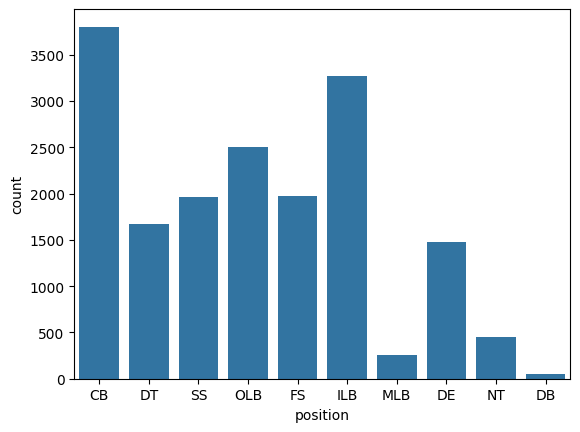

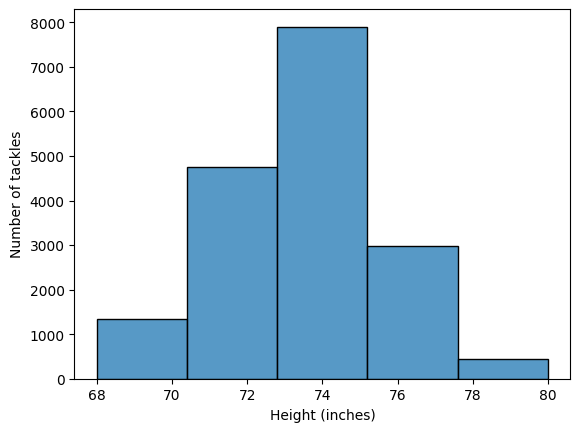

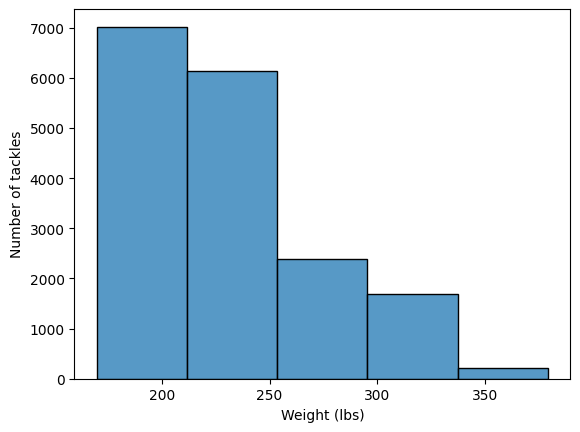

In [19]:
# Distribution of tackles by player position
sns.countplot(x='position', data=merged_df)
plt.show()

# Distribution of tackles by player height
sns.histplot(merged_df['height'], bins=5)
plt.xlabel('Height (inches)')
plt.ylabel('Number of tackles')
plt.show()

# Distribution of tackles by player wright
sns.histplot(merged_df['weight'], bins=5)
plt.xlabel('Weight (lbs)')
plt.ylabel('Number of tackles')
plt.show()

Now let us look at the contribution of these players for successful and unsuccessful tackles

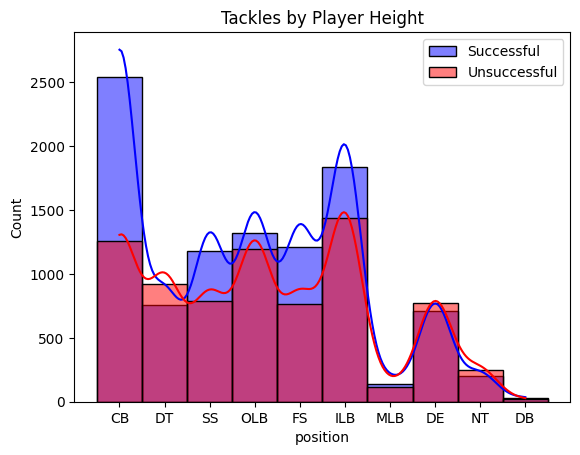

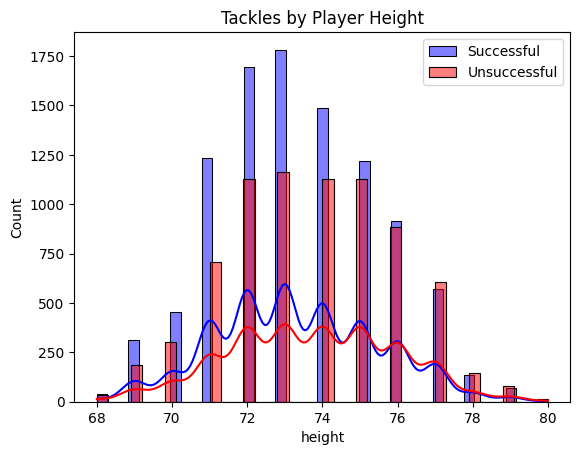

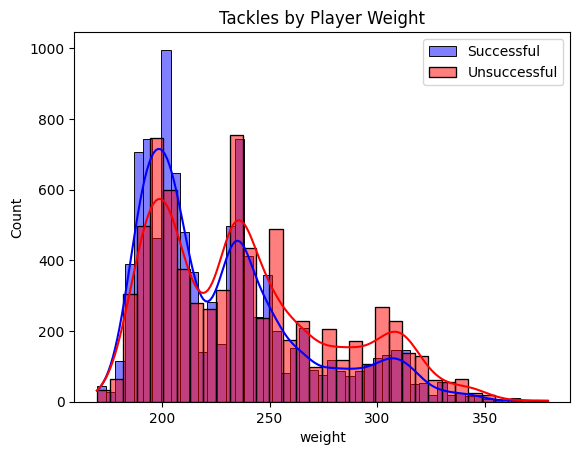

In [20]:
# Distribution of tackles by position with tackle success
sns.histplot(merged_df[merged_df['tackle'] == 1]['position'], kde=True, color='blue', label='Successful')
sns.histplot(merged_df[merged_df['tackle'] == 0]['position'], kde=True, color='red', label='Unsuccessful')
plt.title('Tackles by Player Height')
plt.legend()
plt.show()

# Distribution of tackles by player height with tackle success
sns.histplot(merged_df[merged_df['tackle'] == 1]['height'], kde=True, color='blue', label='Successful')
sns.histplot(merged_df[merged_df['tackle'] == 0]['height'], kde=True, color='red', label='Unsuccessful')
plt.title('Tackles by Player Height')
plt.legend()
plt.show()

# Distribution of tackles by player weight with tackle success
sns.histplot(merged_df[merged_df['tackle'] == 1]['weight'], kde=True, color='blue', label='Successful')
sns.histplot(merged_df[merged_df['tackle'] == 0]['weight'], kde=True, color='red', label='Unsuccessful')
plt.title('Tackles by Player Weight')
plt.legend()
plt.show()


* We can see that players at position like CB, SS, OLB, FS and ILB have positive successful tackles than players at other positions, so one strategy is to try to tackle from these positions to have better success rate.
* Players at lower weight have significantly more tackling success than players with more weight, so players with weight less than 230 have better tackling, however heavy-weight players in the range of 240 to 260 also have higher number of tackles indicating that the mass plays an advantage as well.
* Height and Weight play and important role in tackling but they are not the only attributes as there is overlap in distributions for successful and unsuccessful tackles. 

## 2. Distribution of tackles by each player
Let's look the on-average number of tackles by each player

In [21]:
# Add all the tackles made by each player
tackles_by_players = merged_df.groupby(['nflId'])['tackle'].agg('sum')

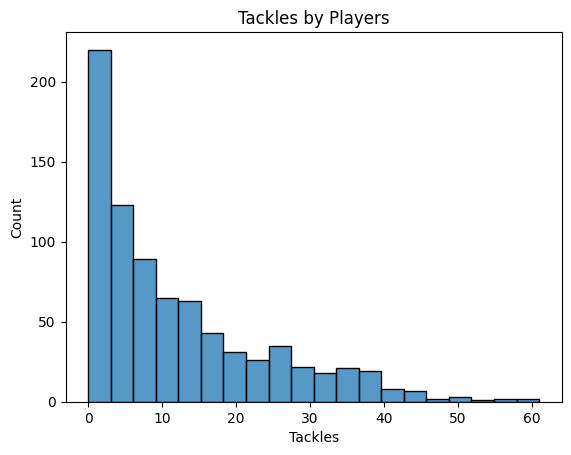

In [22]:
import matplotlib.pyplot as plt
sns.histplot(tackles_by_players, bins=20)
plt.title('Tackles by Players')
plt.xlabel('Tackles')
plt.ylabel('Count')
plt.show()


* We can see that most of the players have tackled 20 or less offensive players in all the games combined
* We can get player characteristics of the players in outliers, to see what exactly attributed to these exceptional number of tackles

## 3. Correlation
The other part is to see if there is any correlation among the attributes that contribute to tackling. So let's take relevant attributes from players, plays they made and within the game itself.

* Player parameters
  - Position
  - Weight
  - Height
* Game parameters
  - score (scored made)
  - pff_missedTackle (no. of missed tackles)
  - assist (assistance to a tackle by other players)
  - forcedFumble (if the tackle is dealt by an offensive player)
  - quarter (to analyze the time management)
* Play parameters
  - down (To see if teams pass the ball more)
  - yardsToGo (distance to reach the goal)

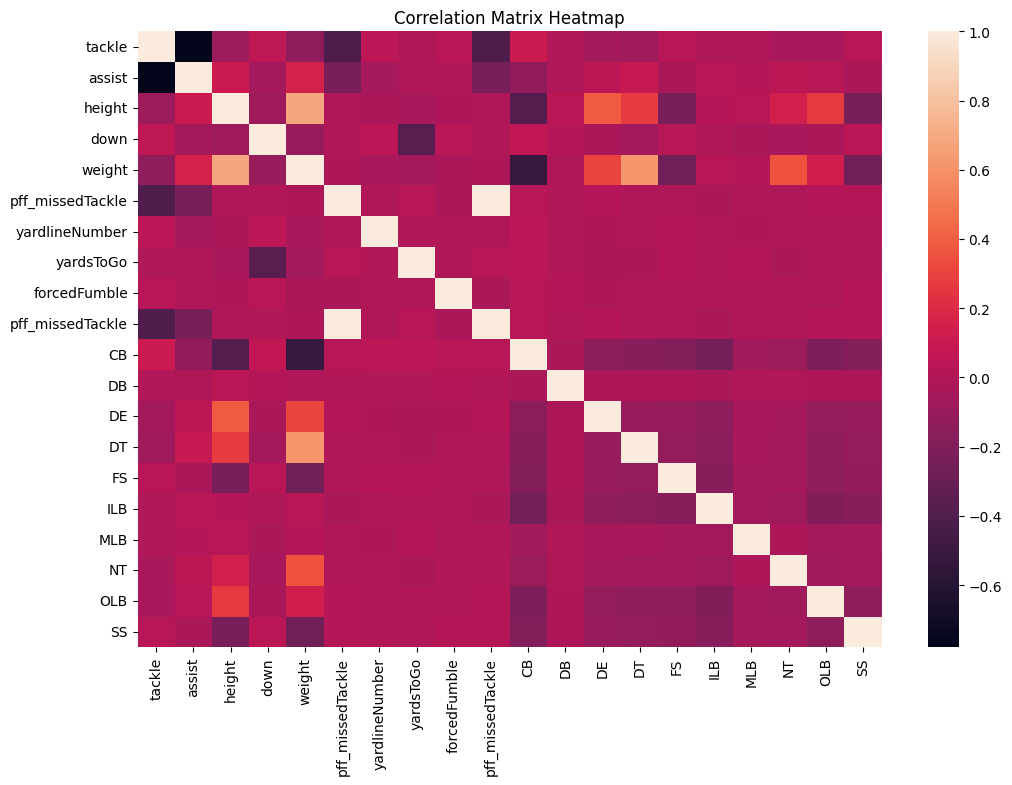

In [23]:
# Selecting the above mentioned features for coorelation analysis
features = ['tackle', 'assist', 'position', 'height', 'down', 'weight', 'pff_missedTackle', 'yardlineNumber', 'yardsToGo', 'forcedFumble', 'pff_missedTackle']
corr_df = merged_df[features]

# Convert categorical variables to dummy variables
# This is needed since correlation needs numerical values
dummys = pd.get_dummies(corr_df['position'])
corr_df = pd.concat([corr_df, dummys], axis=1)

# Drop the 'position' parameter
corr_df.drop('position', axis=1, inplace=True)

# Calculate the correlation matrix
corr_mat = corr_df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

* This shows that there is a positive correlation of parameters like 'assist' and 'forcedFumble' with 'tackle' which implies that there is a relationship between these features and successful tackles.
* The features with minimum correlation will not be as prevalent in the prediction. However, it's correlation doesn't always imply causation, this heatmap shows that there are linear relationships among the features.

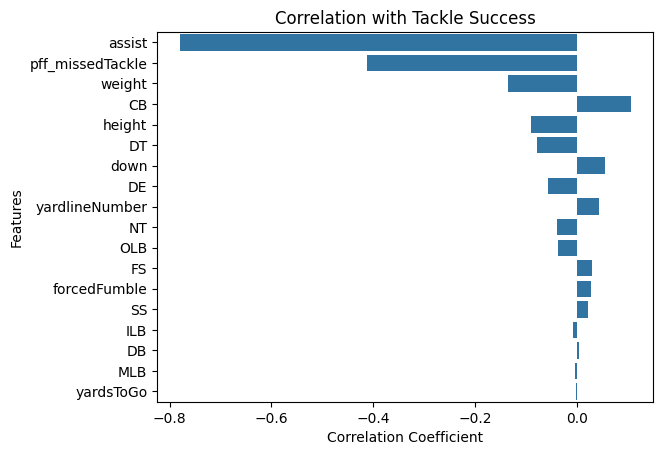

In [24]:
# Sort the correlation matrix with tackle feature
corr_sorted = corr_mat['tackle'].sort_values(key = abs, ascending = False)

# Drop the tackle feature to avoid correlation with itself
corr_sorted.drop('tackle', inplace=True)

# Plot this sorted correlation with a bar plot
sns.barplot(x=corr_sorted.values, y=corr_sorted.index)
plt.title('Correlation with Tackle Success')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

#### Evaluating tackling efficiency from the above bar plot
This bar plot shows the correlation of features with successful tackles. 

* 'assist' feature is most strongly correlated with 'tackle' showing that tackles with assistance tend to be more successful, thereby indicating the importance of team play.
* 'down' and 'yardToGo' features show tackles are less likely to be successful when there are more yards to cover for a first down
  

# Feature Engineering

Now based on the above EDA, let's try to select and create important features:

* *BMI* : We can combine features like height and weight, which show the player's ability to movement.
* *Assist* : It shows if there was a help from other player/s while the tackle was being made. It could how if the tackle has higher success.
* *ForcedFumble* : It shows that players with more of these could dominate on defensive side.
* *Down_yard_number* : This feature combines "down number" and "yards to go" to help predict the offensive team's next move, which affects how the defense is being played.
* *Quarter* : It indicates the game's time flow, like how much time there is to score some number of goals.
* *Tackle* : Target variable (what we wish to predict using the model). It indicates if a tackle was successful or not. 

In [31]:
# BMI feature
def calculate_bmi(height_inches, weight_pounds):
  """Calculates the Body Mass Index (BMI) using the given height and weight.

  Args:
    height_inches: The height of the person in inches.
    weight_pounds: The weight of the person in pounds.

  Returns:
    The BMI of the person.
  """

  height_meters = height_inches * 0.0254  # Convert height to meters
  weight_kg = weight_pounds * 0.453592  # Convert weight to kilograms

  bmi = weight_kg / (height_meters ** 2)

  return bmi

# Calculate the BMI for each row in the DataFrame
merged_df['BMI'] = merged_df.apply(lambda row: calculate_bmi(row['height'], row['weight']), axis=1)

In [32]:
# Down_yard_number feature
merged_df['Down_yard_number'] = merged_df['down'] * merged_df['yardsToGo']

In [33]:
# Feature set
feature_set = ['Down_yard_number', 'BMI', 'quarter', 'assist', 'forcedFumble', 'tackle']
df = merged_df[feature_set]

In [34]:
df.head()

,Down_yard_number,BMI,quarter,assist,forcedFumble,tackle
0,10,25.662507,1,0,0,1
1,10,38.496934,1,0,0,1
2,42,25.903970,1,0,0,1
3,10,29.408182,1,0,0,1
4,12,26.717707,2,0,0,1


In [77]:
# Splitting data into training, and test sets
X = df.drop('tackle', axis=1)
y = df['tackle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standardization
* It helps to improve with convergence of the model by reducing the impact of features with different ranges
* It helps to reduce bias in the model by ensuring all features contribute equally to the predictions
* It helps also with the model's interpretability.

In [78]:
# Standardization of numerical features
def standardize_features(X):
  """Standardizes the features of a dataset.

  Args:
    X: A numpy array of data.

  Returns:
    The standardized data.
  """

  # Calculate the mean and standard deviation of each feature
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)

  # Standardize the features
  X_std = (X - mean) / std

  return X_std

In [79]:
X_train = standardize_features(X_train)
X_val = standardize_features(X_val)
X_test = standardize_features(X_test)

In [80]:
X_train

,Down_yard_number,BMI,quarter,assist,forcedFumble
11351,0.710890,1.796230,0.406969,1.472964,-0.074039
1528,-0.800723,0.786331,0.406969,-0.678903,-0.074039
13105,-0.368833,0.631433,0.406969,1.472964,-0.074039
7125,-0.908695,-0.068132,0.406969,-0.678903,-0.074039
6024,1.574669,-1.407521,1.289399,-0.678903,-0.074039
...,...,...,...,...,...
11284,-0.368833,-0.709781,0.406969,1.472964,-0.074039
11964,1.574669,-0.709781,1.289399,1.472964,-0.074039
5390,-0.800723,-0.975838,-0.475462,-0.678903,-0.074039
860,0.494946,-0.536466,-1.357892,-0.678903,-0.074039


# Model Selection and Training
After splitting the dataset into training and test set, various linear  learning models, like  Logistic Regression, Support Vector Machines (SVM), and Random Forests are trained on the dataset. Model performance was evaluated using accuracy and the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve.

Reasons for using AUC:
* *Model independence* : AUC is a model-agnostic metric. It doesn't depend on the specific decision threshold chosen to classify data points. This is important because the optimal threshold can vary depending on the application's requirements.
* *Threshold invariance* : AUC focuses on the overall ranking of positive and negative instances by the model, not on a specific threshold.
* *Performance Summary*: AUC summarizes the model's performance across all possible thresholds in a single value between 0 and 1. A higher AUC indicates better overall discrimination between positive and negative classes.

## Logistic Regression


We start with logistic regression because:

* It's a simple and interpretable model. This makes it easy to understand how the model works and to identify the facttors that are most important for predicting the outcome.
* Since we know that we have to predict whether a player will make a tackle based on a number of factors, such as the player's BMI, and the down and distance of the play, assist, etc, logistic regression can be used to emphasize the factors that are most important for predicting tackle success by increase its coefficient value relative to the correlation.

In [81]:
#Implementation of a logistic regression from scartch and fit the model to  X_train and y_train dataframes and find the accuracy on y_test

import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

def cost(Y_pred, Y, num_samples):
    return -np.sum(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred)) / num_samples

def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        Y_pred = predict(X, theta)
        error = Y_pred - Y
        theta -= alpha * np.dot(X.T, error)
        cost_history.append(cost(Y_pred, Y, len(Y)))
    return theta, cost_history

# Initialize theta with zeros
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Train the model
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Make predictions
y_pred = predict(X_test, theta)

# Convert probabilities to binary predictions
y_pred = np.where(y_pred > 0.5, 1, 0)

##### Choice of optimization algorithm : Gradient descent
Gradient descent is an iterative optimization algorithm used to find the minimum of a function. In the context of logistic regression, gradient descent is used to find the optimal values of the model parameters that minimize the cost function.

We used gradient descent in logistic regression as our optimization algorithm because it provides an iterative approach to find the minimum of the cost function and achieve the best possible model, and also because it's simple and easy to implement.

In [89]:
# Accuracy of logistic regression model
accuracy = np.mean(y_pred == y_test)

print("Accuracy:", accuracy)

Accuracy: 0.8843947217441194


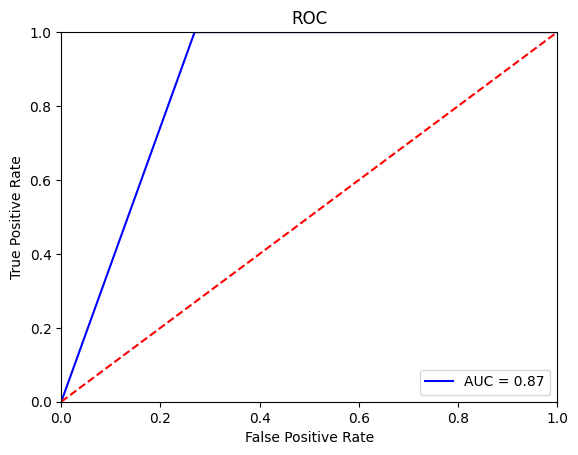

In [88]:
f, t, thres = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('ROC')
plt.plot(f, t, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Conclusion:
* Accuracy: 0.88
* AUC: 0.87
* An AUC of 0.87 shows that there's a high level of model preformance with a good measure of distiction between successful tackle and unsuccessful tackle

## Random Forest

In [95]:
class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        self.n_features = X.shape[1]
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= self.min_samples_split:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            num_samples=y.size,
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

class Node:
    def __init__(self, num_samples, num_samples_per_class, predicted_class):
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_samples=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_samples = n_samples
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            if self.n_samples is None:
                X_subset, y_subset = X, y
            else:
                indices = np.random.choice(len(X), size=self.n_samples, replace=True)
                X_subset, y_subset = X[indices], y[indices]
            tree.fit(X_subset, y_subset)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros((len(X), len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        predictions = np.round(predictions).astype(int)  # Round predictions to the nearest integer
        return np.array([np.argmax(np.bincount(predictions[i])) for i in range(len(X))])

In [96]:
# Create an instance of the RandomForest classifier
rf = RandomForest(n_trees=100, max_depth=10, min_samples_split=2, n_samples=None)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model's performance
accuracy = np.mean(y_pred_rf == y_test)
print(f"Accuracy: {accuracy}")

InvalidIndexError: (slice(None, None, None), 0)

## SVM